### 4.1 Análise Exploratória de Dados
    Livrarias

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Leitura e apresentação do dataset

In [2]:
CO_data=pd.read_csv("./CO_data.csv") 
CO_data

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
0,Afghanistan,1900,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33158,Zimbabwe,2017,14751101.0,2.194784e+10,0.469,9.596,5.900,3068.011,2.062,0.0,0.0,12.12,5.24,3.227
33159,Zimbabwe,2018,15052191.0,2.271535e+10,0.558,11.795,7.178,3441.986,2.281,0.0,0.0,12.44,5.43,4.060
33160,Zimbabwe,2019,15354606.0,NaN,0.570,11.115,6.888,3003.655,NaN,0.0,0.0,12.68,5.50,3.657
33161,Zimbabwe,2020,15669663.0,NaN,0.570,10.608,6.722,2680.132,NaN,0.0,0.0,NaN,NaN,3.317


Análise e exploração dos dados

In [3]:
n_linhas, n_colunas=CO_data.shape
print('Numero de linhas: {}  Numero de colunas: {}'.format(n_linhas, n_colunas))

Numero de linhas: 33163  Numero de colunas: 14


### 1. Construa um gráfico que permita visualizar as emissões totais de CO2 de Portugal no período 1900-2021. Encontre o ano em que foi emitido um valor máximo de CO2.
 
 Cria um novo dataset e vai buscar apenas onde o país é Portugal

In [4]:
CO_data2=CO_data[CO_data['country']=='Portugal']

    Contrução do gráfico

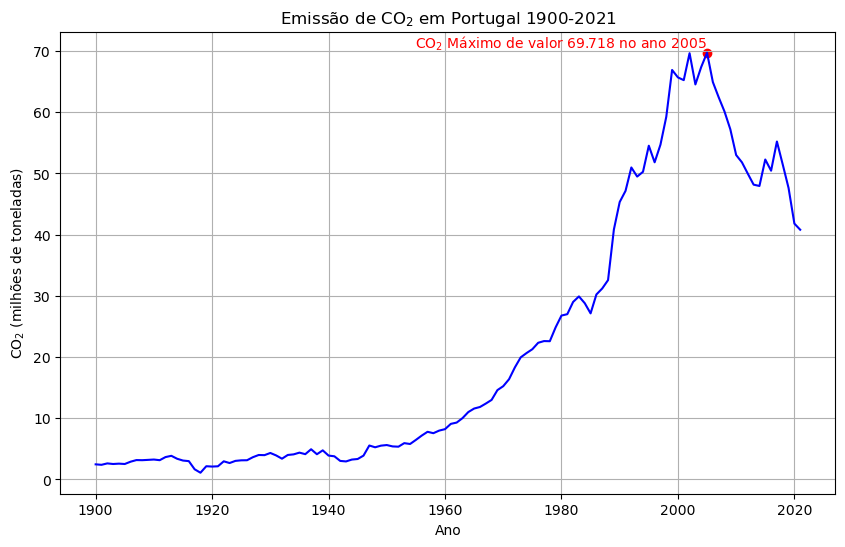

In [16]:
#definir tamanho,valores das colunas e linhas, labels e titulo do gráfico
plt.figure(figsize=(10,6))
plt.plot(CO_data2['year'],CO_data2['co2'],color='blue')
plt.xlabel('Ano')
plt.ylabel('CO$_2$ (milhões de toneladas)')
plt.title('Emissão de CO$_2$ em Portugal 1900-2021')
plt.grid(True)
#vê o valor max de CO2 e o correspondente ano
ano_max_CO2=CO_data2.loc[CO_data2['co2'].idxmax(), 'year']
valor_max_CO2=CO_data2['co2'].max()
# Marcando o ponto do valor máximo no gráfico
plt.scatter(ano_max_CO2,valor_max_CO2,color='red')
plt.text(ano_max_CO2,valor_max_CO2,f'CO$_2$ Máximo de valor {valor_max_CO2} no ano {ano_max_CO2}', horizontalalignment='right',verticalalignment='bottom',color='red');


### 2.Construa um gráfico que permita comparar, no período 1900-2021, as emissões de CO2 de Portugal provenientes de: cimento, carvão, queima (flaring), gas, metano, óxido nitroso e do petróleo.

    Valores nulos

In [6]:
CO_data2[CO_data2.isnull().any(axis=1)] #apresenta as linhas onde pelo menos exista um valor nulo

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
24456,Portugal,1900,5402551.0,1.121330e+10,NaN,2.466,2.422,NaN,NaN,0.000,0.000,NaN,NaN,0.044
24457,Portugal,1901,5445806.0,1.101928e+10,NaN,2.389,2.327,NaN,NaN,0.000,0.000,NaN,NaN,0.062
24458,Portugal,1902,5490822.0,1.108689e+10,NaN,2.620,2.565,NaN,NaN,0.000,0.000,NaN,NaN,0.055
24459,Portugal,1903,5537624.0,1.124269e+10,NaN,2.521,2.455,NaN,NaN,0.000,0.000,NaN,NaN,0.066
24460,Portugal,1904,5584825.0,1.139597e+10,NaN,2.579,2.524,NaN,NaN,0.000,0.000,NaN,NaN,0.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24544,Portugal,1988,10023309.0,1.560413e+11,2.607,32.568,7.914,18061.990,1.160,0.000,0.000,NaN,NaN,22.046
24545,Portugal,1989,10020318.0,1.640594e+11,2.629,40.822,9.563,19507.555,1.191,0.000,0.000,NaN,NaN,28.630
24575,Portugal,2019,10289921.0,NaN,2.225,47.619,5.040,28468.561,NaN,1.133,12.158,11.36,2.99,26.153
24576,Portugal,2020,10298186.0,NaN,2.310,41.800,2.431,25782.078,NaN,1.013,11.993,NaN,NaN,23.215


Como apenas precisamos de Portugal usou-se o dataset que apenas contem Portugal e fomos apenas selecionar as colunas relevantes 

In [7]:
fontes_CO2=['coal_co2','cement_co2','flaring_co2','gas_co2','methane','nitrous_oxide','oil_co2']
#das colunas necessárias vai ao dataset buscar o ano correspondente
dados_fontes_CO2=CO_data2[['year']+fontes_CO2]

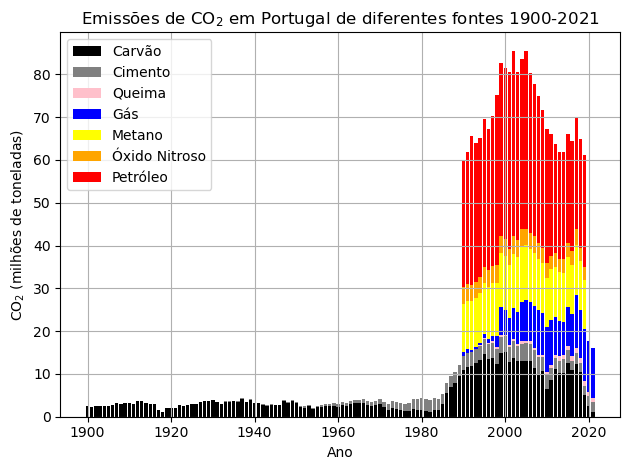

In [18]:
#para cada fonte cria uma coluna por ano com a respetiva cor 
emissions=['coal_co2','cement_co2','flaring_co2','gas_co2','methane','nitrous_oxide','oil_co2']
colors=['black','gray','pink','blue','yellow','orange','red']
labels=['Carvão','Cimento','Queima','Gás','Metano','Óxido Nitroso','Petróleo']
bottom=0
#itera nas listas utilizando zip para combinar os elementos
for value,color,label in zip(emissions,colors,labels):
    plt.bar(dados_fontes_CO2['year'],dados_fontes_CO2[value],bottom=bottom,label=label,color=color)
    bottom+=dados_fontes_CO2[value]
#definir labels titulos e apresentar grid
plt.xlabel('Ano')
plt.ylabel('CO$_2$ (milhões de toneladas)')
plt.title('Emissões de CO$_2$ em Portugal de diferentes fontes 1900-2021')
plt.legend(loc='upper left')
plt.grid(True)
#garante que os componentes não ficam subrepostos
plt.tight_layout()


### 3. Construa um gráfico que permita comparar, no período 1900-2021, as emissões de CO2 per capita de Portugal com a Espanha. 

Neste ponto usamos uma abordagem diferente da alínea anterior, onde ao dataset inicial vamos apenas buscar os países necessários .
Para calcular as emissões per capita é criado uma nova coluna com os calculos da formula abaixo

$$
CO_2 = \frac{emissões  CO_2}{população}
$$



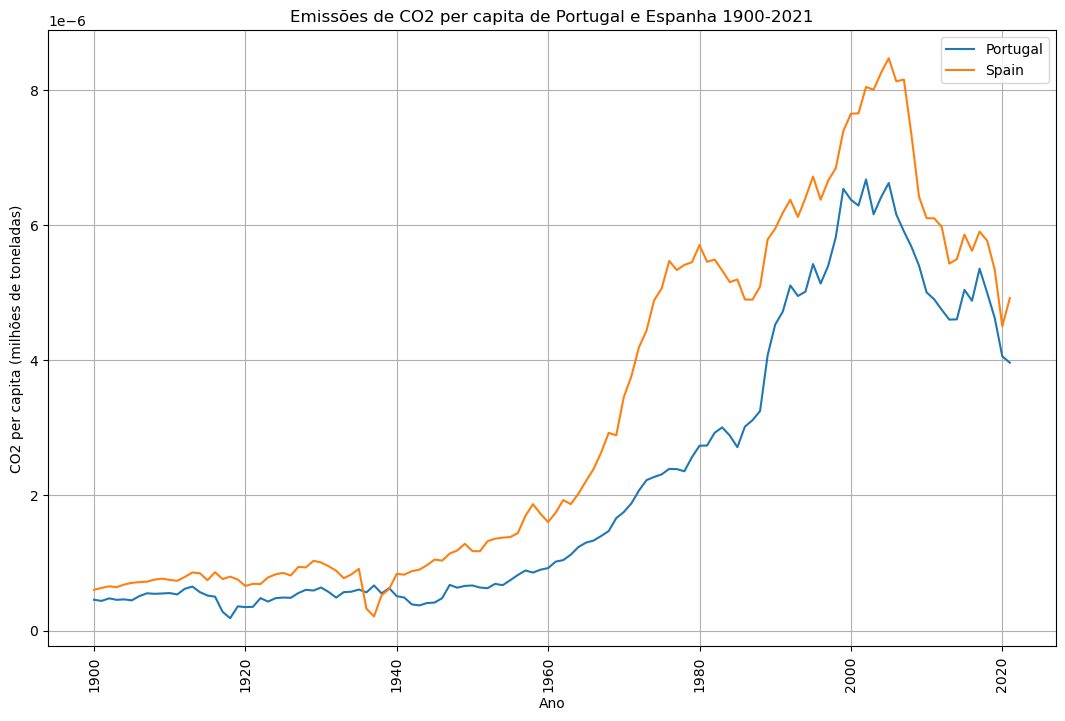

In [15]:
CO_data['co2_percapita']=CO_data['co2']/CO_data['population']

#cria o gráfico em cada 
plt.figure(figsize=(13,8))
for pais in ['Portugal','Spain']:
    valores=CO_data[CO_data['country']==pais]
    plt.plot(valores['year'],valores['co2_percapita'],label=pais)
plt.xlabel('Ano')
plt.ylabel('CO2 per capita (milhões de toneladas)')
plt.title('Emissões de CO2 per capita de Portugal e Espanha 1900-2021')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90);


Além de gráfico de barras não ser a melhor abordagem permite ver mais ao detalhe por ano, podendo tirar conclusões em que anos concretos é que portugal ultrapassou espanha

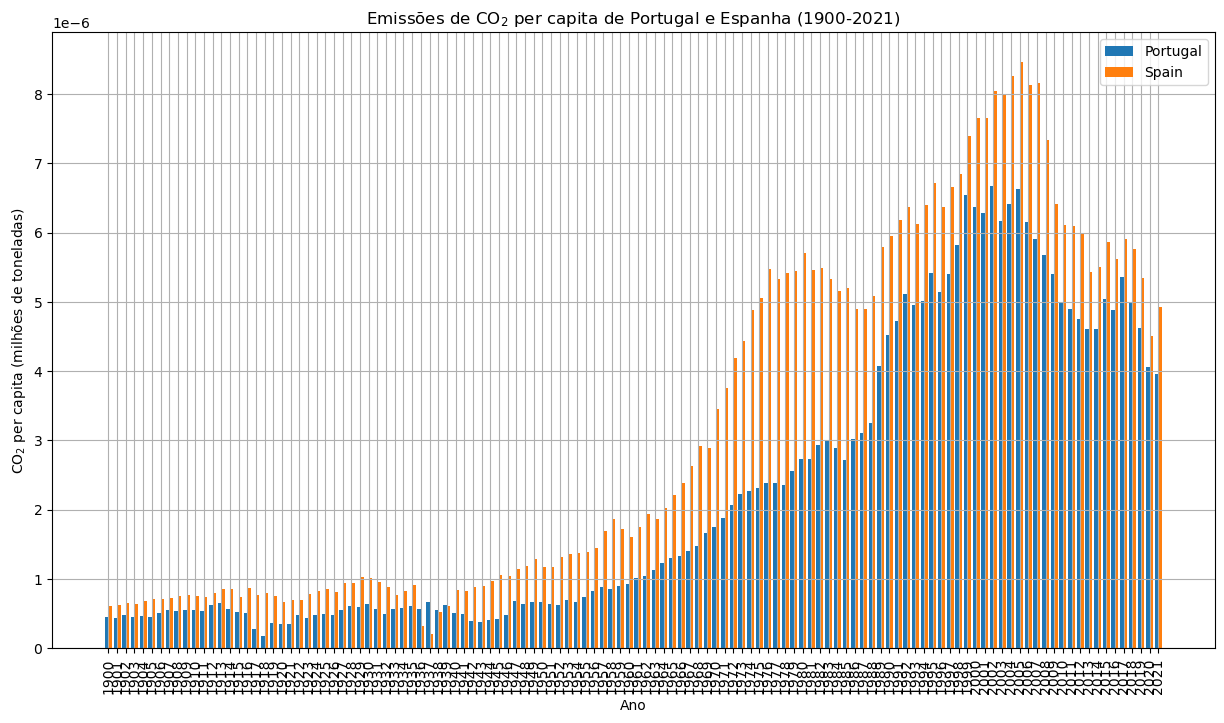

In [10]:
#gráfico de cima mas em barra
largura = 0.4
plt.figure(figsize=(15, 8))
#para cada país vai buscar o valor de co2 em um respetivo ano
for i, pais in enumerate(['Portugal', 'Spain']):
    valores= CO_data[CO_data['country'] == pais]
    #posiciona as barras tendo em conta a largura e ajusta
    posicao_barras = np.arange(len(valores['year'])) + (i * largura) - 0.2
    plt.bar(posicao_barras, valores['co2_percapita'], width=largura, label=pais)
plt.xticks(np.arange(len(valores['year'])), valores['year'],rotation=90)
plt.xlabel('Ano')
plt.ylabel('CO$_2$ per capita (milhões de toneladas)')
plt.title('Emissões de CO$_2$ per capita de Portugal e Espanha (1900-2021)')
plt.legend()
plt.grid(True)


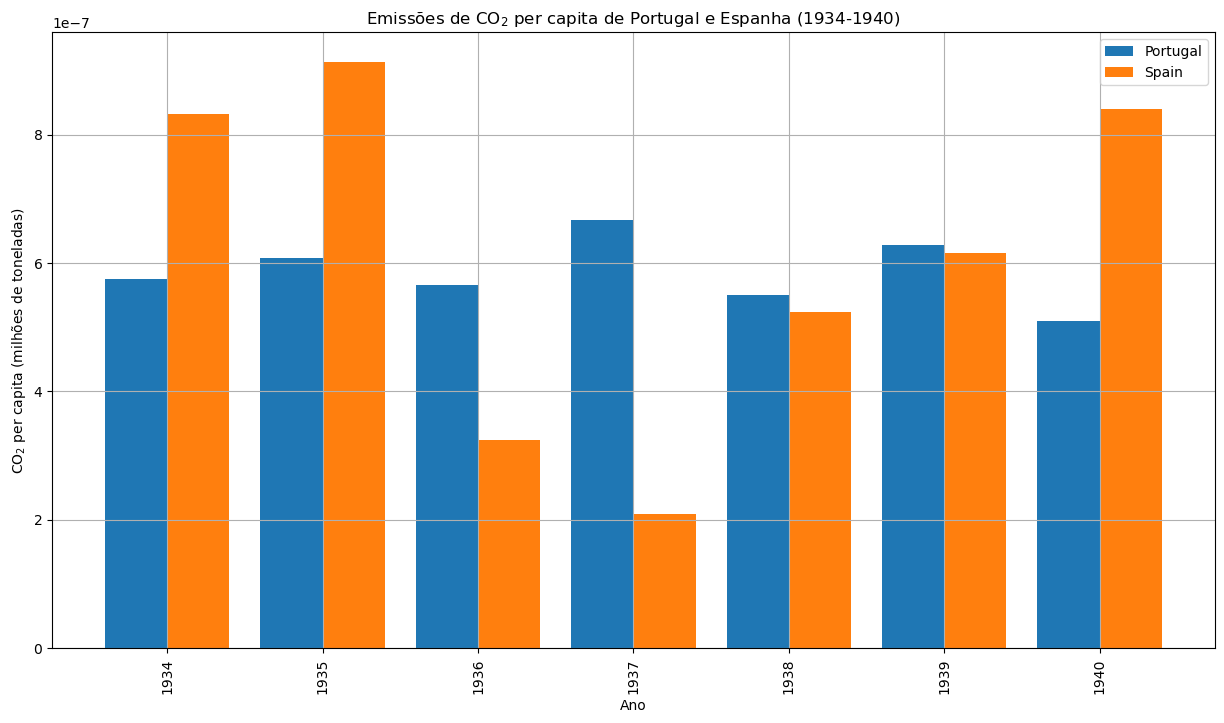

In [11]:
# Definindo os anos desejados
anos=range(1934, 1941)

largura=0.4
plt.figure(figsize=(15, 8))

# Para cada país, vamos buscar os valores de CO2 para os anos desejados
for i, pais in enumerate(['Portugal', 'Spain']):
    valores = CO_data[(CO_data['country'] == pais) & (CO_data['year'].isin(anos))]
    posicao_barras = np.arange(len(valores)) + (i * largura) - 0.2
    plt.bar(posicao_barras, valores['co2_percapita'], width=largura, label=pais)

# Configurações do gráfico
plt.xticks(np.arange(len(anos)),anos,rotation=90)
plt.xlabel('Ano')
plt.ylabel('CO$_2$ per capita (milhões de toneladas)')
plt.title('Emissões de CO$_2$ per capita de Portugal e Espanha (1934-1940)')
plt.legend()
plt.grid(True)
plt.show()


### 4.Construa um gráfico que permita comparar as emissões de CO2 originadas pelo carvão dos Estados Unidos, China, Índia, União Europeia (a 27) e a Rússia no período 2000-2021.

    Aqui é criado um novo dataset com os países e anos necessários e verificado os valores nulos. 

In [12]:
CO_data4=CO_data[(CO_data['country'].isin(['United States','China','India','European Union (27)','Russia','Spain']))&(CO_data['year']>=2000)]
CO_data4[CO_data4.isnull().any(axis=1)]

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2,co2_percapita
6097,China,2019,1.421864e+09,NaN,826.876,10740.996,7543.157,28277.445,NaN,3.806,630.171,1176.34,552.28,1559.728,0.000008
6098,China,2020,1.424930e+09,NaN,858.233,10956.213,7605.717,29133.936,NaN,5.119,687.881,NaN,NaN,1627.725,0.000008
6099,China,2021,1.425894e+09,NaN,852.961,11472.368,7955.985,30768.826,NaN,4.677,773.866,NaN,NaN,1713.340,0.000008
9860,European Union (27),2000,4.266351e+08,NaN,93.135,3602.431,1206.396,42188.777,NaN,20.726,720.438,457.51,272.77,1517.932,0.000008
9861,European Union (27),2001,4.274247e+08,NaN,90.866,3659.970,1202.167,42953.371,NaN,19.593,744.666,450.12,271.98,1559.083,0.000009
9862,European Union (27),2002,4.283784e+08,NaN,89.957,3661.412,1207.522,42566.457,NaN,20.255,750.403,444.35,267.71,1549.518,0.000009
9863,European Union (27),2003,4.296991e+08,NaN,91.186,3744.551,1240.882,43268.727,NaN,21.258,788.426,440.87,267.62,1558.702,0.000009
9864,European Union (27),2004,4.311704e+08,NaN,95.363,3755.608,1236.321,43729.906,NaN,19.998,806.366,433.11,269.20,1552.362,0.000009
9865,European Union (27),2005,4.326267e+08,NaN,95.824,3735.896,1199.353,43593.957,NaN,20.843,828.728,427.31,263.00,1546.537,0.000009
9866,European Union (27),2006,4.340453e+08,NaN,98.590,3745.674,1217.848,43787.137,NaN,22.766,830.051,422.54,252.92,1531.073,0.000009


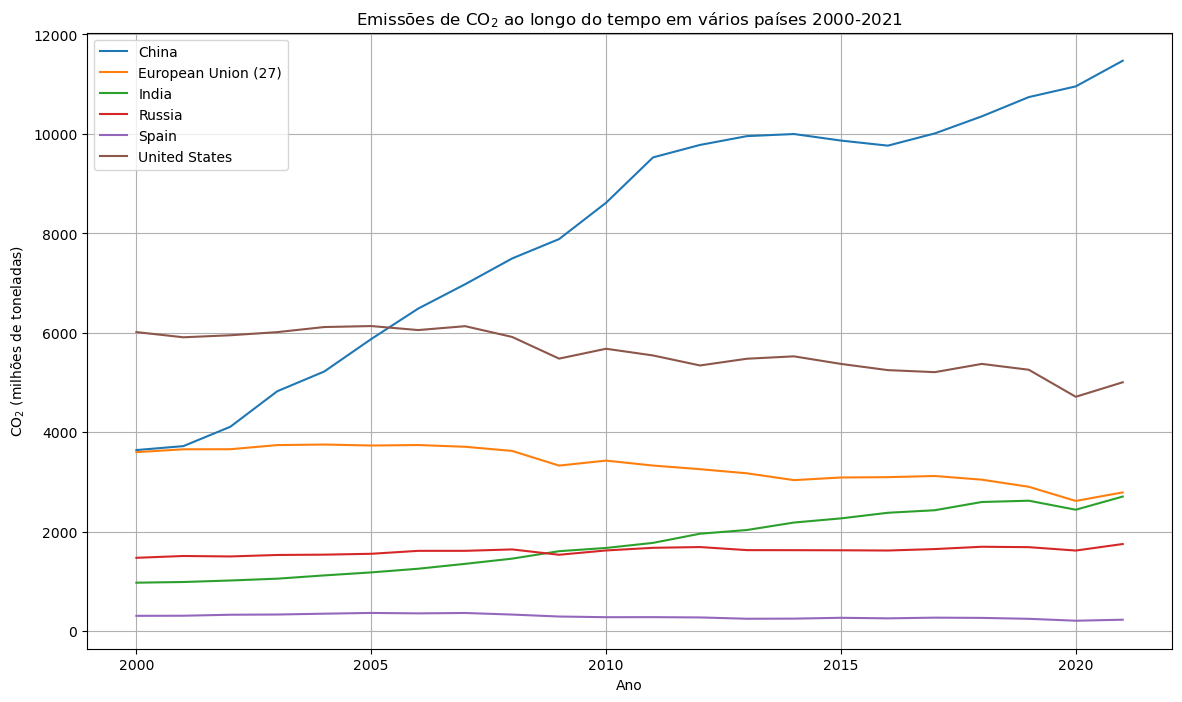

In [13]:
#time series
plt.figure(figsize=(14,8))
#para cada país filtra os dados(usado para a label) e apresenta
for country in CO_data4['country'].unique():
    # Filtra os dados para o país atual
    country_co2=CO_data4[CO_data4['country']==country]
    # Plota os dados para o país atual
    plt.plot(country_co2['year'],country_co2['co2'],label=country)
plt.xlabel('Ano')
plt.ylabel('CO$_2$ (milhões de toneladas)')
plt.title('Emissões de CO$_2$ ao longo do tempo em vários países 2000-2021')
plt.legend()
plt.grid(True)

### 5. Construa uma tabela que indique, para cada uma das regiões: Estados Unidos, China, Índia, União Europeia (a 27) e a Rússia, as médias das emissões de CO2 devidas a cimento, carvão, queima (flaring), gas, metano, óxido nitroso e do petróleo no período 2000-2021. (formate as entradas da tabela de forma a terem apenas 3 casas decimais).

    Na alínea anterior já é feito a verificação dos nulos, ou seja os anos em que não se tem conhecimento dos valores.
    É criado um novo dataset  utilizando o da alinea anterior já que possuía os países e anos que se precisava e apenas       selecionamos as colunas necessárias

In [14]:
CO_data5=CO_data4.groupby('country').agg({'cement_co2':'mean','coal_co2':'mean','flaring_co2':'mean','gas_co2':'mean','methane':'mean','nitrous_oxide':'mean','oil_co2':'mean'})
CO_data5=CO_data5.round(3)
#construção da tabela
CO_data5.columns=['CO2 do cimento','CO2 do carvão','CO2 da queima (flaring)','CO2 do gás','Metano','Óxido nitroso','CO2 do petróleo']
print("-----------Médias das emissões de CO2 por tipo de emissão e região 2000-2021 -----------")
CO_data5

-----------Médias das emissões de CO2 por tipo de emissão e região 2000-2021 -----------


,CO2 do cimento,CO2 do carvão,CO2 da queima (flaring),CO2 do gás,Metano,Óxido nitroso,CO2 do petróleo
country,,,,,,,
China,599.141,5920.797,1.722,287.021,1015.726,476.530,1116.257
European Union (27),81.488,1049.236,21.132,774.871,407.444,238.482,1374.161
India,91.512,1123.795,2.661,92.464,617.360,228.242,469.662
Russia,21.837,413.504,43.061,766.698,599.007,58.484,353.289
Spain,11.972,59.527,2.925,62.223,39.032,21.342,156.162
United States,40.055,1750.037,52.728,1364.198,639.154,259.030,2379.692
